
# üìä An√°lise Explorat√≥ria - Ofertas Rel√¢mpago - Desafio T√©cnico

- Nome: Thiago Augusto Santos Lima

Este estudo analisa resultados de ofertas do tipo rel√¢mpago realizadas em um per√≠odo e pa√≠ses espec√≠ficos, buscando entender quais fatores mais influenciam o desempenho das promo√ß√µes.
Formas de avaliar os resultados:
- N√∫mero de vendas ‚Äì volume total de itens vendidos.
- Aproveitamento de estoque ‚Äì propor√ß√£o vendida em rela√ß√£o ao estoque dispon√≠vel.
- Receita gerada ‚Äì valor total obtido com as vendas.

Hip√≥teses levantadas:
- O frete gr√°tis aumenta o volume de vendas?
- O hor√°rio de in√≠cio da promo√ß√£o impacta o resultado?
- Promo√ß√µes com mais tempo no ar geram mais vendas?
- O desempenho varia de acordo com a vertical do produto?


### Importa√ß√£o das Bibliotecas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

### Importa√ß√£o dos dados

In [53]:
df = pd.read_csv("datasets/ofertas_relampago.csv")

### Valida√ß√£o e Tratamento de Dados

Primeiro, vamos garantir que os tipos das vari√°veis est√£o corretos e obter uma vis√£o geral de cada uma delas.

In [54]:
date_cols = ["OFFER_START_DATE", "OFFER_START_DTTM", "OFFER_FINISH_DTTM"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

num_cols = ["INVOLVED_STOCK", "REMAINING_STOCK_AFTER_END", "SOLD_AMOUNT", "SOLD_QUANTITY"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df["ORIGIN"] = df["ORIGIN"].replace("NA", np.nan)
df["SHIPPING_PAYMENT_TYPE"] = df["SHIPPING_PAYMENT_TYPE"].replace(to_replace=["none", "None", "NONE"], value=np.nan)


skim(df)

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ skimpy summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ          Data Summary                Data Types                                                                 ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì                                                          ‚îÇ
‚îÇ ‚îÉ Dataframe         ‚îÉ Values ‚îÉ ‚îÉ Column Type ‚îÉ Count ‚îÉ                                                          ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©                                                          ‚îÇ
‚îÇ ‚îÇ Number of rows    ‚îÇ 48746  ‚îÇ ‚îÇ string      ‚îÇ 6     ‚îÇ                                                          ‚îÇ
‚îÇ ‚îÇ Number of columns ‚îÇ 13     ‚îÇ ‚îÇ datetime64  ‚îÇ 3     ‚îÇ                                                          ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îÇ int64       ‚îÇ 2     ‚îÇ                                                          ‚îÇ
‚îÇ                                ‚îÇ float64     ‚îÇ 2     ‚îÇ                                                          ‚îÇ
‚îÇ                                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                          ‚îÇ
‚îÇ                                                     number                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column            ‚îÉ NA    ‚îÉ NA %             ‚îÉ mean  ‚îÉ sd    ‚îÉ p0   ‚îÉ p25  ‚îÉ p50   ‚îÉ p75   ‚îÉ p100 ‚îÉ hist   ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©  ‚îÇ
‚îÇ ‚îÇ INVOLVED_STOCK    ‚îÇ     0 ‚îÇ                0 ‚îÇ 35.01 ‚îÇ 206.8 ‚îÇ    1 ‚îÇ    5 ‚îÇ    10 ‚îÇ    15 ‚îÇ 9000 ‚îÇ   ‚ñà    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ REMAINING_STOCK_A ‚îÇ     0 ‚îÇ                0 ‚îÇ 30.57 ‚îÇ 195.8 ‚îÇ -192 ‚îÇ    4 ‚îÇ     8 ‚îÇ    15 ‚îÇ 8635 ‚îÇ   ‚ñà    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ FTER_END          ‚îÇ       ‚îÇ                  ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ      ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ        ‚îÇ  ‚îÇ
‚îÇ ‚îÇ SOLD_AMOUNT       ‚îÇ 24167 ‚îÇ 49.5774012226644 ‚îÇ 51.21 ‚îÇ 175.3 ‚îÇ 0.28 ‚îÇ 5.73 ‚îÇ 12.42 ‚îÇ 30.93 ‚îÇ 4837 ‚îÇ   ‚ñà    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ                   ‚îÇ       ‚îÇ                2 ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ      ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ        ‚îÇ  ‚îÇ
‚îÇ ‚îÇ SOLD_QUANTITY     ‚îÇ 24167 ‚îÇ 49.5774012226644 ‚îÇ 10.85 ‚îÇ 45.48 ‚îÇ    1 ‚îÇ    1 ‚îÇ     3 ‚îÇ     6 ‚îÇ 1646 ‚îÇ   ‚ñà    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ                   ‚îÇ       ‚îÇ                2 ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ      ‚îÇ       ‚îÇ       ‚îÇ      ‚îÇ        ‚îÇ  ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

### Rela√ß√£o Vendas e Estoques

Foi criada a vari√°vel Vendas Calculadas com o objetivo de analisar o comportamento do estoque e validar os processos gerais. Nessa perspectiva, Vendas Calculadas deveria ser equivalente a SOLD_QUANTITY, mas, na pr√°tica, isso n√£o ocorre.

In [55]:
df['VENDAS_CALCULADAS'] = df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END']

df_erro_vendas = df[df['SOLD_QUANTITY'].notna() & (df['SOLD_QUANTITY'] != df['VENDAS_CALCULADAS'])]
print(f"Quantidade de promo√ß√µes onde 'Vendas != Estoque - Estoque_after': {len(df_erro_vendas)}")
display(df_erro_vendas)

Quantidade de promo√ß√µes onde 'Vendas != Estoque - Estoque_after': 2995


OFFER_START_DATE          OFFER_START_DTTM         OFFER_FINISH_DTTM  \
33          2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 19:00:00+00:00   
37          2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 21:00:00+00:00   
93          2021-06-22 2021-06-22 19:00:00+00:00 2021-06-23 01:00:09+00:00   
99          2021-06-22 2021-06-22 16:00:00+00:00 2021-06-22 19:28:55+00:00   
153         2021-06-22 2021-06-22 19:00:00+00:00 2021-06-23 01:00:03+00:00   
...                ...                       ...                       ...   
48489       2021-06-19 2021-06-19 10:00:00+00:00 2021-06-19 18:00:00+00:00   
48490       2021-06-19 2021-06-19 10:00:00+00:00 2021-06-19 18:00:00+00:00   
48570       2021-06-19 2021-06-19 19:00:00+00:00 2021-06-20 01:00:05+00:00   
48628       2021-06-19 2021-06-19 15:00:00+00:00 2021-06-19 23:00:00+00:00   
48740       2021-06-19 2021-06-19 07:00:00+00:00 2021-06-19 13:00:02+00:00   

           OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  \
33     lightning_deal              15                         11        26.82   
37     lightning_deal              10                          8        13.34   
93     lightning_deal              10                          9        13.58   
99     lightning_deal               7                         -3        15.57   
153    lightning_deal               5                          3        24.99   
...               ...             ...                        ...          ...   
48489  lightning_deal              30                         26        90.40   
48490  lightning_deal              30                         26       271.20   
48570  lightning_deal               5                          5         5.21   
48628  lightning_deal              30                         27         9.61   
48740  lightning_deal              15                         15        21.23   

       SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE         DOM_DOMAIN_AGG1  \
33               5.0    NaN         free_shipping                 APPAREL   
37               3.0      A         free_shipping              HOME&DECOR   
93               2.0    NaN         free_shipping               PETS FOOD   
99               6.0      A         free_shipping               PETS FOOD   
153              3.0    NaN         free_shipping                FOOTWEAR   
...              ...    ...                   ...                     ...   
48489            1.0      A         free_shipping              HOME&DECOR   
48490            3.0      A         free_shipping              HOME&DECOR   
48570            4.0    NaN                   NaN                  SPORTS   
48628            4.0      A                   NaN  TOOLS AND CONSTRUCTION   
48740            2.0    NaN         free_shipping              HOME&DECOR   

              VERTICAL                   DOMAIN_ID  VENDAS_CALCULADAS  
33        APP & SPORTS                 MLM-BLOUSES                  4  
37     HOME & INDUSTRY                    MLM-MUGS                  2  
93                 CPG     MLM-CATS_AND_DOGS_FOODS                  1  
99                 CPG     MLM-CATS_AND_DOGS_FOODS                 10  
153       APP & SPORTS  MLM-SANDALS_AND_FLIP_FLOPS                  2  
...                ...                         ...                ...  
48489  HOME & INDUSTRY             MLM-FRAME_POOLS                  4  
48490  HOME & INDUSTRY             MLM-FRAME_POOLS                  4  
48570     APP & SPORTS       MLM-KINESIOLOGY_TAPES                  0  
48628  HOME & INDUSTRY           MLM-ANGLE_FINDERS                  3  
48740  HOME & INDUSTRY        MLM-CHRISTMAS_LIGHTS                  0  

[2995 rows x 14 columns]

Al√©m disso, existe outro problema: estoque p√≥s-venda negativo. Isso acontece quando a quantidade vendida ultrapassa o estoque reservado. Como n√£o √© poss√≠vel garantir a exist√™ncia de itens em outro tipo de estoque, essas vendas excedentes devem ser desconsideradas.

### Ofertas com estoque negativo p√≥s ofertas

Promo√ß√µes com estoque ap√≥s final negativo por VERTICAL:


VERTICAL
HOME & INDUSTRY    343
BEAUTY & HEALTH    297
APP & SPORTS       215
CE                 185
CPG                107
ACC                 87
T & B               36
OTHERS               3
dtype: int64

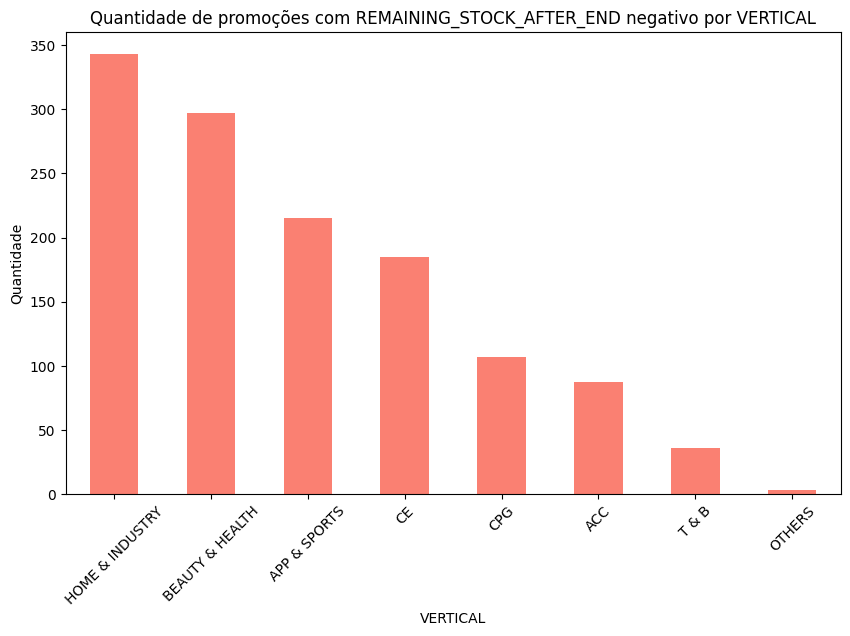

In [56]:
df_estoque_neg = df[df['REMAINING_STOCK_AFTER_END'] < 0]
tabela_estoque_neg = df_estoque_neg.groupby('VERTICAL').size().sort_values(ascending=False)
print("Promo√ß√µes com estoque ap√≥s final negativo por VERTICAL:")
display(tabela_estoque_neg)

plt.figure(figsize=(10,6))
tabela_estoque_neg.plot(kind='bar', color='salmon')

plt.title("Quantidade de promo√ß√µes com REMAINING_STOCK_AFTER_END negativo por VERTICAL")
plt.ylabel("Quantidade")
plt.xlabel("VERTICAL")
plt.xticks(rotation=45)
plt.show()

Partindo da hip√≥tese de que isso possa ter ocorrido em √°reas espec√≠ficas, foi avaliado o percentual de ocorr√™ncia em cada vertical.

In [57]:
total_por_vertical = df.groupby('VERTICAL').size()
negativos_por_vertical = df_estoque_neg.groupby('VERTICAL').size()
tabela_percentual = pd.DataFrame({ 'total_promos': total_por_vertical, 'promos_estoque_negativo': negativos_por_vertical }).fillna(0)
tabela_percentual['percentual_negativo'] = tabela_percentual['promos_estoque_negativo'] / tabela_percentual['total_promos']
tabela_percentual = tabela_percentual.sort_values(by='percentual_negativo', ascending=False)
print("Percentual de promo√ß√µes com REMAINING_STOCK_AFTER_END negativo por VERTICAL:")
display(tabela_percentual)

Percentual de promo√ß√µes com REMAINING_STOCK_AFTER_END negativo por VERTICAL:


total_promos  promos_estoque_negativo  percentual_negativo
VERTICAL                                                                   
BEAUTY & HEALTH          7150                    297.0             0.041538
CPG                      2714                    107.0             0.039425
ACC                      2573                     87.0             0.033813
HOME & INDUSTRY         11011                    343.0             0.031151
CE                       8629                    185.0             0.021439
APP & SPORTS            13241                    215.0             0.016237
T & B                    2624                     36.0             0.013720
OTHERS                    279                      3.0             0.010753
ENTERTAINMENT             525                      0.0             0.000000

Outro caso relevante identificado foi a exist√™ncia de promo√ß√µes com dura√ß√£o inferior a 1 minuto, que n√£o geraram nenhuma venda. Como n√£o √© poss√≠vel garantir que essas promo√ß√µes tenham ocorrido de fato, elas foram exclu√≠das das an√°lises.

### Promo√ß√µes com dura√ß√£o menor que 1 minuto

In [58]:
df['DURACAO_HORAS'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600

promo_menos_1min = df[df['DURACAO_HORAS'] < (1/60)]
qtd_menos_1min = len(promo_menos_1min)
total_promos = len(df)
proporcao = qtd_menos_1min / total_promos * 100
print(f"Promo√ß√µes com dura√ß√£o < 1 minuto: {qtd_menos_1min} ({proporcao:.2f}%)")

Promo√ß√µes com dura√ß√£o < 1 minuto: 3814 (7.82%)


Considerando a exist√™ncia de promo√ß√µes com menos de 1 minuto e a inconsist√™ncia nos dados de SOLD_QUANTITY, foram realizados alguns tratamentos e exclus√µes. Entre os principais ajustes:

- Todas as vendas passaram a ser consideradas com base nas movimenta√ß√µes de estoque.
- Ap√≥s a corre√ß√£o das vendas, o SOLD_AMOUNT tamb√©m foi ajustado, utilizando o valor de ticket_m√©dio.
- Ofertas que resultaram em estoque p√≥s-venda negativo foram corrigidas, considerando apenas as vendas poss√≠veis.

In [59]:
df = df[df['DURACAO_HORAS'] >= (1/60)]

df['VALOR_UNITARIO'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']
mask_corrigir = df['SOLD_AMOUNT'].isna() & (df['VENDAS_CALCULADAS'] > 0)
df.loc[mask_corrigir, 'SOLD_AMOUNT'] = df.loc[mask_corrigir, 'VENDAS_CALCULADAS'] * df.loc[mask_corrigir, 'VALOR_UNITARIO']

mask_estoque_neg = df['REMAINING_STOCK_AFTER_END'] < 0
df.loc[mask_estoque_neg, 'SOLD_QUANTITY'] = df.loc[mask_estoque_neg, 'VENDAS_CALCULADAS'] + df.loc[mask_estoque_neg, 'REMAINING_STOCK_AFTER_END']
df.loc[mask_estoque_neg, 'REMAINING_STOCK_AFTER_END'] = 0

### Valores Faltantes

Foram identificados valores faltantes, especialmente nas informa√ß√µes de SOLD_AMOUNT e SOLD_QUANTITY.

In [60]:
total_promos = len(df)
qtd_sold_amount_nan = df['SOLD_AMOUNT'].isna().sum()
perc_sold_amount_nan = (qtd_sold_amount_nan / total_promos) * 100
qtd_sold_quantity_nan = df['SOLD_QUANTITY'].isna().sum()
perc_sold_quantity_nan = (qtd_sold_quantity_nan / total_promos) * 100
print(f"Promo√ß√µes sem SOLD_AMOUNT: {qtd_sold_amount_nan} ({perc_sold_amount_nan:.2f}%)")
print(f"Promo√ß√µes sem SOLD_QUANTITY: {qtd_sold_quantity_nan} ({perc_sold_quantity_nan:.2f}%)")

Promo√ß√µes sem SOLD_AMOUNT: 20353 (45.30%)
Promo√ß√µes sem SOLD_QUANTITY: 20321 (45.23%)


In [61]:
# Total de promo√ß√µes com SOLD_AMOUNT ausente
total_sold_amount_nan = df['SOLD_AMOUNT'].isna().sum()

# Promo√ß√µes sem SOLD_AMOUNT mas com vendas calculadas > 0
df_sem_valor_mais_vendas = df[(df['SOLD_AMOUNT'].isna()) & (df['VENDAS_CALCULADAS'] > 0)]
qtd_sem_valor_mais_vendas = len(df_sem_valor_mais_vendas)

# Calcular porcentagem em rela√ß√£o ao total de SOLD_AMOUNT ausente
perc_sem_valor_mais_vendas = (qtd_sem_valor_mais_vendas / total_sold_amount_nan) * 100 if total_sold_amount_nan > 0 else 0

print(f"Promo√ß√µes sem SOLD_AMOUNT: {total_sold_amount_nan}")
print(f"Dessas, promo√ß√µes com vendas > 0: {qtd_sem_valor_mais_vendas} ({perc_sem_valor_mais_vendas:.2f}%)")


Promo√ß√µes sem SOLD_AMOUNT: 20353
Dessas, promo√ß√µes com vendas > 0: 588 (2.89%)


## An√°lises Vis√£o Geral

In [62]:
# Vis√£o geral (total)
visao_geral = pd.DataFrame({
    'ofertas_realizadas': [len(df)], 
    'total_vendas': [df['SOLD_QUANTITY'].sum()],
    'total_receita': [df['SOLD_AMOUNT'].sum()],
    'total_estoque': [df['INVOLVED_STOCK'].sum()]
})
visao_geral['aproveitamento_estoque'] = visao_geral['total_vendas'] / visao_geral['total_estoque']
print("\nVis√£o geral:")
display(visao_geral)





Vis√£o geral:


ofertas_realizadas  total_vendas  total_receita  total_estoque  \
0               44932      264051.0      1258663.5        1641073   

   aproveitamento_estoque  
0                0.160901

In [63]:
metricas_vertical = df.groupby('VERTICAL').agg(
    ofertas_realizadas=('VERTICAL', 'size'),  # quantidade de linhas por vertical
    total_vendas=('SOLD_QUANTITY', 'sum'),
    total_receita=('SOLD_AMOUNT', 'sum'),
    total_estoque=('INVOLVED_STOCK', 'sum')
).reset_index()
metricas_vertical['aproveitamento_estoque'] = metricas_vertical['total_vendas'] / metricas_vertical['total_estoque']
print("\nVis√£o por VERTICAL:")
display(metricas_vertical)


Vis√£o por VERTICAL:


VERTICAL  ofertas_realizadas  total_vendas  total_receita  \
0              ACC                2358        4981.0       26819.98   
1     APP & SPORTS               12322       25146.0      131101.36   
2  BEAUTY & HEALTH                6552      177396.0      547427.27   
3               CE                7850       21608.0      362787.94   
4              CPG                2455        5475.0       16787.68   
5    ENTERTAINMENT                 479         357.0        1988.57   
6  HOME & INDUSTRY               10250       26530.0      155518.68   
7           OTHERS                 240         354.0        1929.24   
8            T & B                2426        2204.0       14302.78   

   total_estoque  aproveitamento_estoque  
0          22277                0.223594  
1         222608                0.112961  
2         890289                0.199257  
3         201675                0.107143  
4          37278                0.146869  
5           2784                0.128233  
6         220667                0.120226  
7           2389                0.148179  
8          41106                0.053617

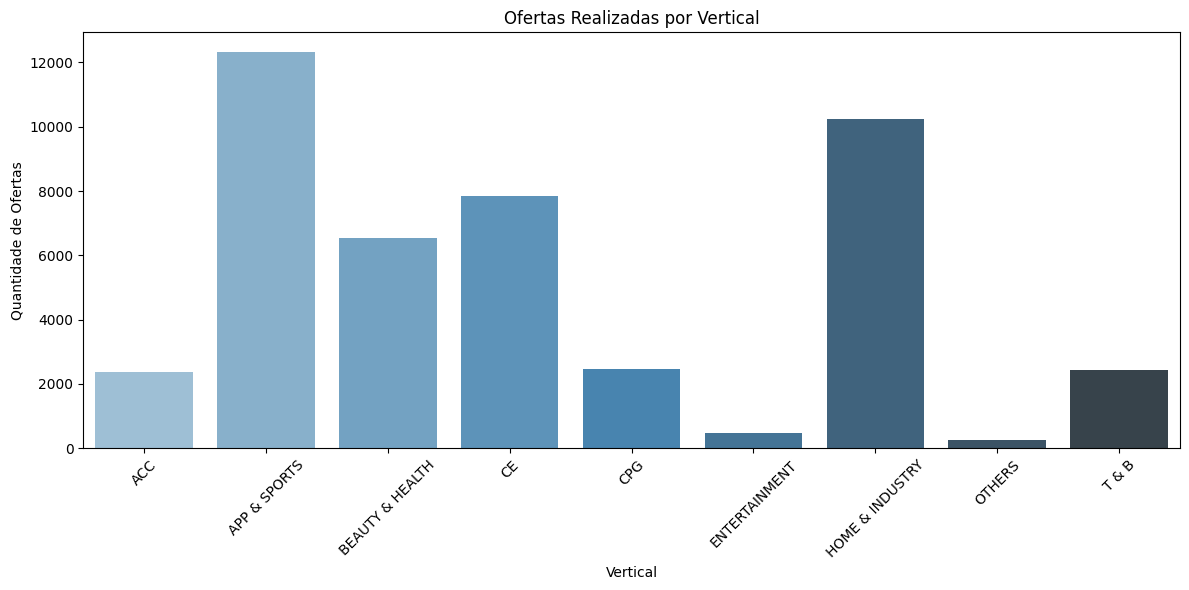

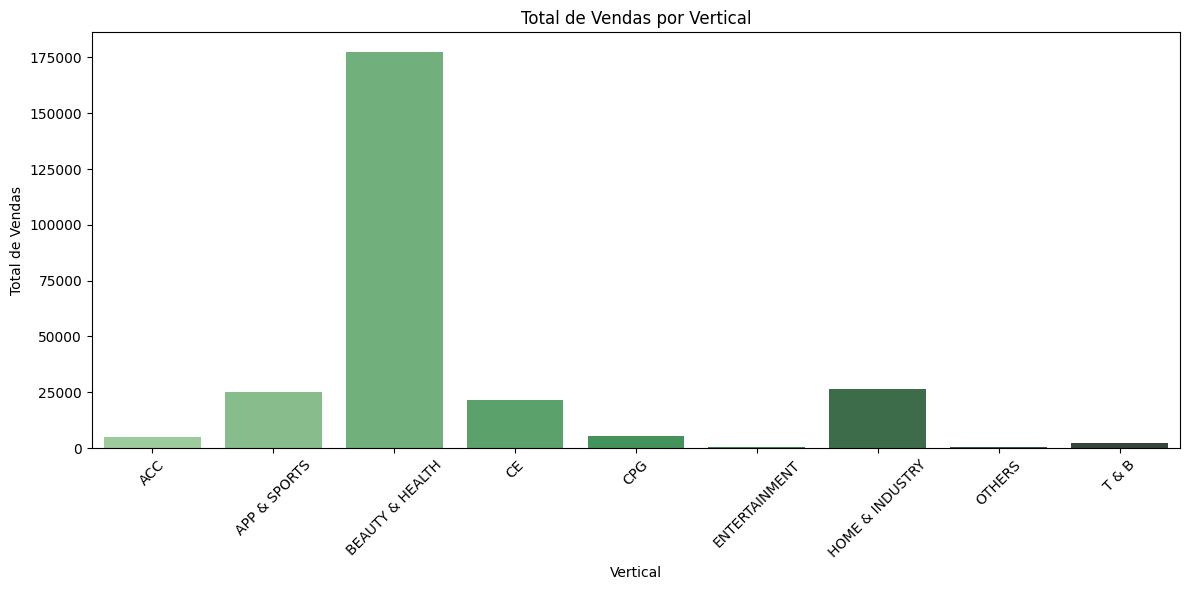

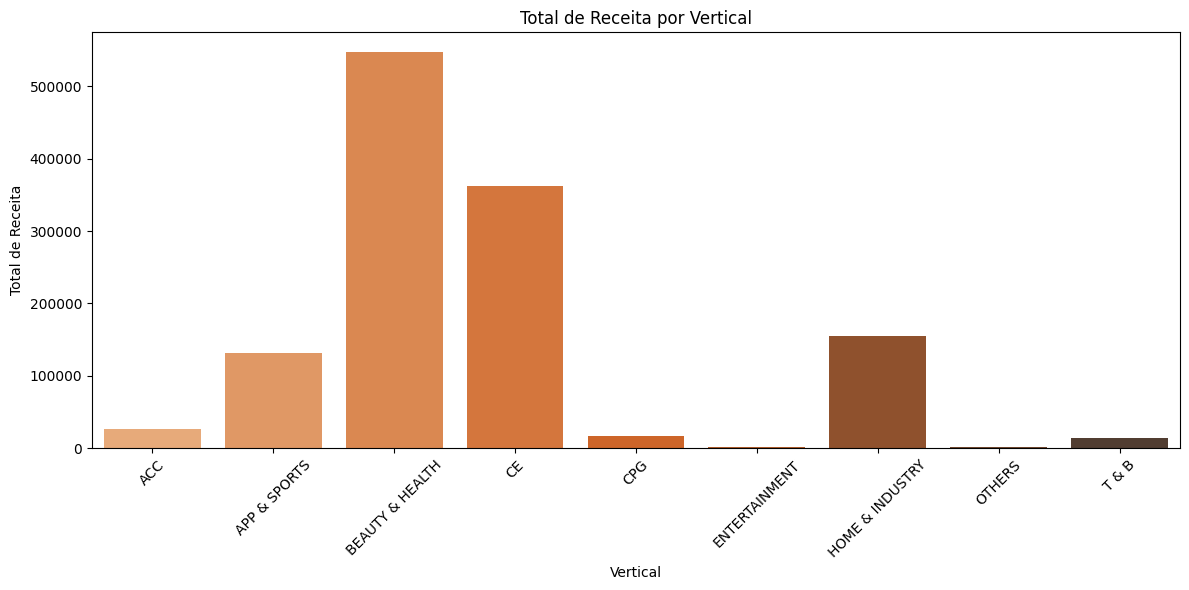

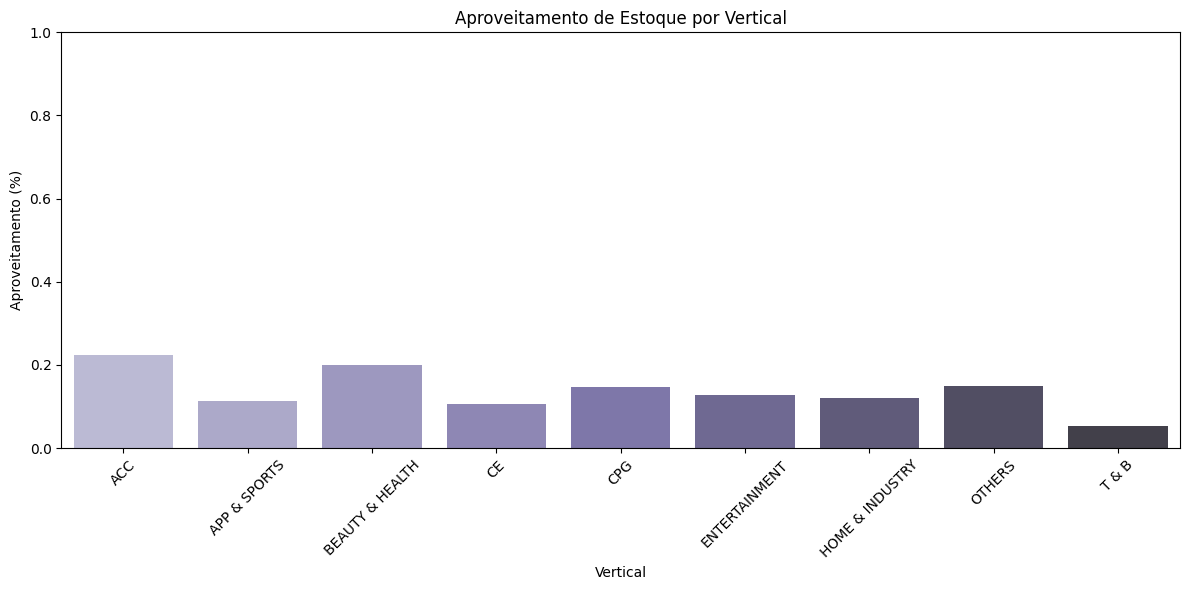

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='ofertas_realizadas', data=metricas_vertical, palette='Blues_d')
plt.title('Ofertas Realizadas por Vertical')
plt.ylabel('Quantidade de Ofertas')
plt.xlabel('Vertical')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='total_vendas', data=metricas_vertical, palette='Greens_d')
plt.title('Total de Vendas por Vertical')
plt.ylabel('Total de Vendas')
plt.xlabel('Vertical')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='total_receita', data=metricas_vertical, palette='Oranges_d')
plt.title('Total de Receita por Vertical')
plt.ylabel('Total de Receita')
plt.xlabel('Vertical')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='aproveitamento_estoque', data=metricas_vertical, palette='Purples_d')
plt.title('Aproveitamento de Estoque por Vertical')
plt.ylabel('Aproveitamento (%)')
plt.xlabel('Vertical')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.tight_layout()
plt.show()

## Aproveitamento de Estoque de 100%

Seguiremos com algumas an√°lises focando nas ofertas que tiveram 100% de aproveitamento do estoque, tentando entender a jornada de sucesso.

Total de ofertas com 100% de aproveitamento: 3817
Receita total gerada por essas ofertas: 264298.24
Distribui√ß√£o por VERTICAL:


VERTICAL  ofertas_100pct  receita_100pct
0              ACC             240         8018.10
1     APP & SPORTS             828        23561.36
2  BEAUTY & HEALTH             849       133380.98
3               CE             687        51488.43
4              CPG             223         4478.13
5    ENTERTAINMENT              17          417.35
6  HOME & INDUSTRY             877        40762.01
7           OTHERS               9          260.48
8            T & B              87         1931.40

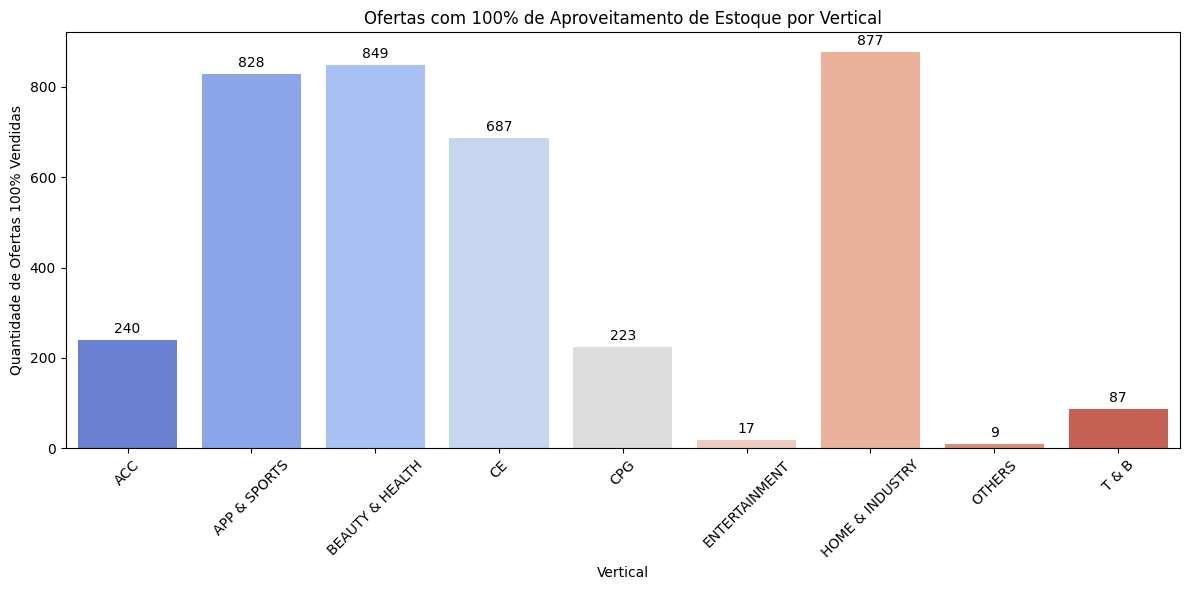

In [65]:

# An√°lise de ofertas com 100% de aproveitamento de estoque

# Filtrar promo√ß√µes com aproveitamento de estoque igual a 100%
df['aproveitamento_individual'] = df['SOLD_QUANTITY'] / df['INVOLVED_STOCK']
df_100pct = df[df['aproveitamento_individual'] >= 1]

# Contagem por VERTICAL
metricas_100pct_vertical = df_100pct.groupby('VERTICAL').agg(
    ofertas_100pct=('VERTICAL', 'size'),
    receita_100pct=('SOLD_AMOUNT', 'sum')
).reset_index()

# Adicionar total geral para refer√™ncia
total_100pct = df_100pct.shape[0]
total_receita_100pct = df_100pct['SOLD_AMOUNT'].sum()
print(f"Total de ofertas com 100% de aproveitamento: {total_100pct}")
print(f"Receita total gerada por essas ofertas: {total_receita_100pct:.2f}")
print("Distribui√ß√£o por VERTICAL:")
display(metricas_100pct_vertical)

# Gr√°fico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(x='VERTICAL', y='ofertas_100pct', data=metricas_100pct_vertical, palette='coolwarm')
plt.title('Ofertas com 100% de Aproveitamento de Estoque por Vertical')
plt.ylabel('Quantidade de Ofertas 100% Vendidas')
plt.xlabel('Vertical')
plt.xticks(rotation=45)

# Adicionar r√≥tulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3), textcoords='offset points')

plt.tight_layout()
plt.show()


Como o Frete Gr√°tis se apresentou nessas ofertas?

Percentual de frete gr√°tis entre todas as ofertas com 100% de aproveitamento: 32.41%
Presen√ßa de frete gr√°tis entre ofertas com 100% de aproveitamento por VERTICAL:


VERTICAL  ofertas_100pct  frete_gratis_count  prop_frete_gratis
0              ACC             240                  69           0.287500
1     APP & SPORTS             828                 268           0.323671
2  BEAUTY & HEALTH             849                 244           0.287397
3               CE             687                 274           0.398836
4              CPG             223                  57           0.255605
5    ENTERTAINMENT              17                   9           0.529412
6  HOME & INDUSTRY             877                 295           0.336374
7           OTHERS               9                   2           0.222222
8            T & B              87                  19           0.218391

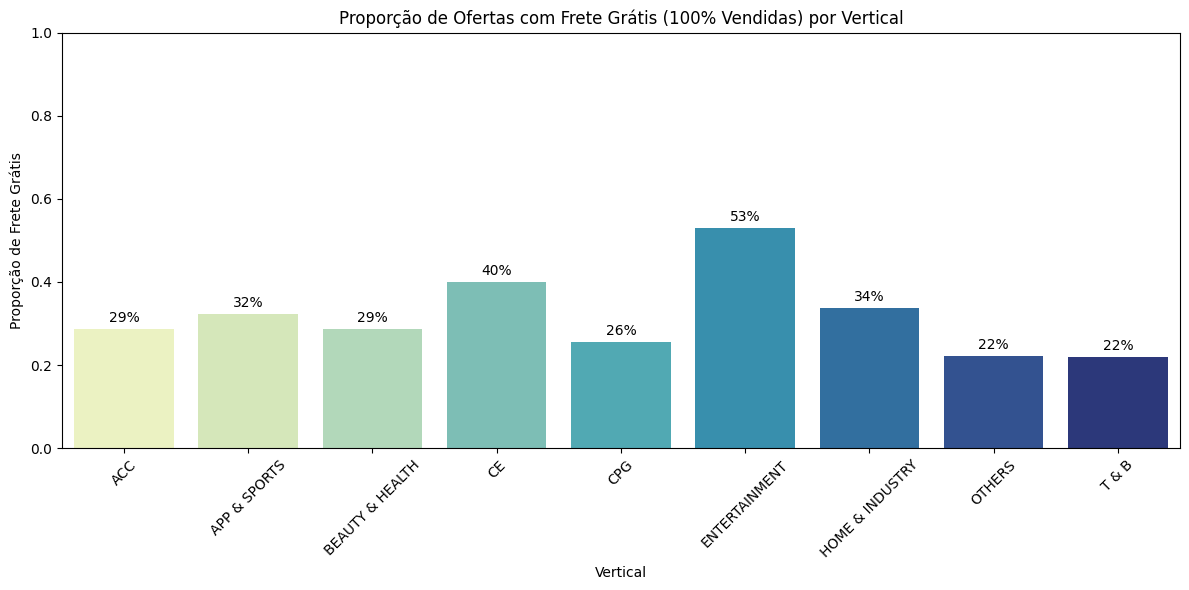

In [66]:
# Criar flag para frete gr√°tis baseado em SHIPPING_PAYMENT_TYPE
df_100pct.loc[:, 'frete_gratis'] = df_100pct['SHIPPING_PAYMENT_TYPE'] == 'free_shipping'

# Percentual geral de frete gr√°tis
total_ofertas_100pct = df_100pct.shape[0]
total_frete_gratis = df_100pct['frete_gratis'].sum()
percentual_frete_gratis = total_frete_gratis / total_ofertas_100pct
print(f"Percentual de frete gr√°tis entre todas as ofertas com 100% de aproveitamento: {percentual_frete_gratis:.2%}")

# Contagem e propor√ß√£o de frete gr√°tis por VERTICAL
frete_100pct_vertical = df_100pct.groupby('VERTICAL').agg(
    ofertas_100pct=('VERTICAL', 'size'),
    frete_gratis_count=('frete_gratis', 'sum')
).reset_index()
frete_100pct_vertical['prop_frete_gratis'] = frete_100pct_vertical['frete_gratis_count'] / frete_100pct_vertical['ofertas_100pct']

print("Presen√ßa de frete gr√°tis entre ofertas com 100% de aproveitamento por VERTICAL:")
display(frete_100pct_vertical)

# Gr√°fico de barras com propor√ß√£o de frete gr√°tis
plt.figure(figsize=(12,6))
ax = sns.barplot(x='VERTICAL', y='prop_frete_gratis', data=frete_100pct_vertical, palette='YlGnBu')
plt.title('Propor√ß√£o de Ofertas com Frete Gr√°tis (100% Vendidas) por Vertical')
plt.ylabel('Propor√ß√£o de Frete Gr√°tis')
plt.xlabel('Vertical')
plt.ylim(0,1)
plt.xticks(rotation=45)

# Adicionar r√≥tulos em porcentagem
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3), textcoords='offset points')

plt.tight_layout()
plt.show()

O turno foi um fator determinante?

In [67]:
# Garantir que a coluna TURNO exista no df_100pct

def get_turno(hora):
    if 6 <= hora < 12:
        return 'Manh√£'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'
    
df_100pct.loc[:, 'TURNO'] = df_100pct['OFFER_START_DTTM'].dt.hour.apply(get_turno)

turno_percentual_100pct = df_100pct['TURNO'].value_counts(normalize=True).sort_index()
print("Percentual de ofertas por turno (100% aproveitadas):")
print(turno_percentual_100pct.to_frame(name='percentual'))


Percentual de ofertas por turno (100% aproveitadas):
       percentual
TURNO            
Manh√£    0.218234
Noite    0.370186
Tarde    0.411580


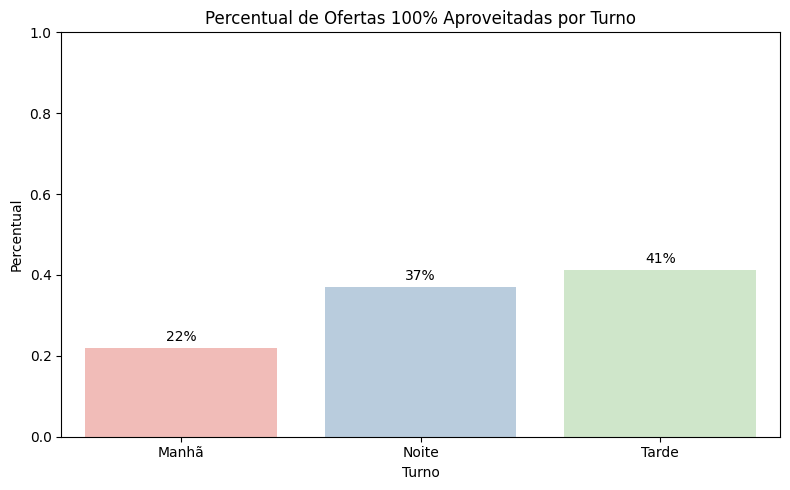

In [68]:
# Gr√°fico de barras para percentual de ofertas por turno
plt.figure(figsize=(8,5))
ax2 = sns.barplot(x=turno_percentual_100pct.index, y=turno_percentual_100pct.values, palette='Pastel1')
plt.title('Percentual de Ofertas 100% Aproveitadas por Turno')
plt.ylabel('Percentual')
plt.xlabel('Turno')
plt.ylim(0,1)

# Adicionar r√≥tulos em porcentagem
for i, v in enumerate(turno_percentual_100pct.values):
    ax2.text(i, v + 0.01, f'{v:.0%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Vis√£o Top Vendas e Receitas

An√°lise geral de vendas e receita por VERTICAL

In [69]:

# Agrupar por VERTICAL, somando total de vendas e total de receita
tabela_vertical = df.groupby('VERTICAL').agg(
    total_vendas=('SOLD_QUANTITY', 'sum'),
    total_receita=('SOLD_AMOUNT', 'sum')
).reset_index()

# Ordenar pela quantidade de vendas decrescente
tabela_vertical = tabela_vertical.sort_values(by='total_vendas', ascending=False)

print("Resumo de vendas e receita por VERTICAL:")
display(tabela_vertical)


Resumo de vendas e receita por VERTICAL:


VERTICAL  total_vendas  total_receita
2  BEAUTY & HEALTH      177396.0      547427.27
6  HOME & INDUSTRY       26530.0      155518.68
1     APP & SPORTS       25146.0      131101.36
3               CE       21608.0      362787.94
4              CPG        5475.0       16787.68
0              ACC        4981.0       26819.98
8            T & B        2204.0       14302.78
5    ENTERTAINMENT         357.0        1988.57
7           OTHERS         354.0        1929.24

In [70]:
# Ordenar o DataFrame original pela receita decrescente
top_receita_ofertas = df.sort_values(by='SOLD_AMOUNT', ascending=False)

print("Top receita por oferta individual:")
display(top_receita_ofertas)

Top receita por oferta individual:


OFFER_START_DATE          OFFER_START_DTTM         OFFER_FINISH_DTTM  \
11449       2021-07-27 2021-07-27 09:00:00+00:00 2021-07-27 17:01:05+00:00   
37095       2021-06-18 2021-06-18 15:00:00+00:00 2021-06-18 23:00:00+00:00   
13737       2021-07-19 2021-07-19 13:00:00+00:00 2021-07-19 21:00:55+00:00   
45804       2021-07-26 2021-07-26 17:00:00+00:00 2021-07-27 01:00:05+00:00   
13742       2021-07-19 2021-07-19 12:00:00+00:00 2021-07-19 20:00:00+00:00   
...                ...                       ...                       ...   
48736       2021-06-19 2021-06-19 15:00:00+00:00 2021-06-19 23:00:00+00:00   
48738       2021-06-19 2021-06-19 15:00:00+00:00 2021-06-19 23:00:01+00:00   
48739       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 21:00:00+00:00   
48742       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:01+00:00   
48745       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:00+00:00   

           OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  \
11449  lightning_deal            2000                        497      4836.57   
37095  lightning_deal             100                         45      4678.68   
13737  lightning_deal            4000                       2358      4570.31   
45804  lightning_deal            2000                       1931      4264.51   
13742  lightning_deal            7000                       5650      3988.84   
...               ...             ...                        ...          ...   
48736  lightning_deal              10                         10          NaN   
48738  lightning_deal              10                         10          NaN   
48739  lightning_deal              30                         30          NaN   
48742  lightning_deal               5                          5          NaN   
48745  lightning_deal              15                         15          NaN   

       SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE   DOM_DOMAIN_AGG1  \
11449         1503.0      A                   NaN  BEAUTY EQUIPMENT   
37095           75.0      A         free_shipping            MOBILE   
13737         1646.0      A                   NaN     PHARMACEUTICS   
45804           67.0      A         free_shipping            MOBILE   
13742         1358.0      A                   NaN     PHARMACEUTICS   
...              ...    ...                   ...               ...   
48736            NaN      A         free_shipping            MOBILE   
48738            NaN      A         free_shipping            MOBILE   
48739            NaN      A                   NaN        HOME&DECOR   
48742            NaN    NaN         free_shipping        HOME&DECOR   
48745            NaN    NaN         free_shipping        HOME&DECOR   

              VERTICAL                          DOMAIN_ID  VENDAS_CALCULADAS  \
11449  BEAUTY & HEALTH              MLM-DISPOSABLE_GLOVES               1503   
37095               CE                     MLM-CELLPHONES                 55   
13737  BEAUTY & HEALTH  MLM-SURGICAL_AND_INDUSTRIAL_MASKS               1642   
45804               CE                     MLM-CELLPHONES                 69   
13742  BEAUTY & HEALTH  MLM-SURGICAL_AND_INDUSTRIAL_MASKS               1350   
...                ...                                ...                ...   
48736               CE                     MLM-TELEPHONES                  0   
48738               CE                     MLM-TELEPHONES                  0   
48739  HOME & INDUSTRY                        MLM-MIRRORS                  0   
48742  HOME & INDUSTRY           MLM-DECORATIVE_PAINTINGS                  0   
48745  HOME & INDUSTRY                     MLM-BED_SHEETS                  0   

       DURACAO_HORAS  VALOR_UNITARIO  aproveitamento_individual  
11449       8.018056        3.217944                     0.7515  
37095       8.000000       62.382400                     0.7500  
13737       8.015278        2.776616                     0.4115  
45804       8.0013

## An√°lise de Relev√¢ncia do Frete Gr√°tis

Ser√£o analisadas as influ√™ncias do Frete Gr√°tis numa vis√£o geral e dentro de cada segmento. Ser√£o utilizados testes de hip√≥teses estat√≠sticos.

Vis√£o geral:

In [71]:


# Criar coluna frete_gratis
df['frete_gratis'] = np.where(df['SHIPPING_PAYMENT_TYPE'] == "free_shipping", "Frete Gr√°tis", "Sem Frete Gr√°tis")

# Distribui√ß√£o de promo√ß√µes com frete gr√°tis
total_promos = len(df)
total_frete_gratis = df[df['frete_gratis'] == "Frete Gr√°tis"].shape[0]
percentual_frete_gratis = total_frete_gratis / total_promos
print(f"Promo√ß√µes com frete gr√°tis: {total_frete_gratis} de {total_promos} ({percentual_frete_gratis:.2%})")


# Testes de hip√≥teses: vendas, aproveitamento e receita


# M√©dia de VENDAS
grupo_frete_vendas = df[df['frete_gratis'] == "Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()
grupo_sem_frete_vendas = df[df['frete_gratis'] == "Sem Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()

t_stat_vendas, p_val_vendas = stats.ttest_ind(grupo_frete_vendas, grupo_sem_frete_vendas, equal_var=False)
print(f"\nM√©dia de vendas calculadas:")
print(f"Frete Gr√°tis: {grupo_frete_vendas.mean():.2f}")
print(f"Sem Frete Gr√°tis: {grupo_sem_frete_vendas.mean():.2f}")
print(f"Teste T estat√≠stica: {t_stat_vendas:.3f}, p-valor: {p_val_vendas:.4f}")

# Aproveitamento de estoque (propor√ß√£o de ofertas com 100% aproveitamento)
df['aproveitamento'] = df['VENDAS_CALCULADAS'] / df['INVOLVED_STOCK']
df['100pct_vendas'] = df['aproveitamento'] >= 1

aproveitamento_frete = df[df['frete_gratis'] == "Frete Gr√°tis"]['100pct_vendas']
aproveitamento_sem_frete = df[df['frete_gratis'] == "Sem Frete Gr√°tis"]['100pct_vendas']

# Teste de propor√ß√£o
contingency_table = np.array([
    [aproveitamento_frete.sum(), (~aproveitamento_frete).sum()],
    [aproveitamento_sem_frete.sum(), (~aproveitamento_sem_frete).sum()]
])
chi2, p_val_aproveitamento, _, _ = stats.chi2_contingency(contingency_table)

print(f"\nAproveitamento 100% de estoque:")
print(f"Frete Gr√°tis: {aproveitamento_frete.mean():.2%}")
print(f"Sem Frete Gr√°tis: {aproveitamento_sem_frete.mean():.2%}")
print(f"Teste qui-quadrado p-valor: {p_val_aproveitamento:.4f}")

# Receita m√©dia
grupo_frete_receita = df[df['frete_gratis'] == "Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()
grupo_sem_frete_receita = df[df['frete_gratis'] == "Sem Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()

t_stat_receita, p_val_receita = stats.ttest_ind(grupo_frete_receita, grupo_sem_frete_receita, equal_var=False)
print(f"\nReceita m√©dia por oferta:")
print(f"Frete Gr√°tis: {grupo_frete_receita.mean():.2f}")
print(f"Sem Frete Gr√°tis: {grupo_sem_frete_receita.mean():.2f}")
print(f"Teste T estat√≠stica: {t_stat_receita:.3f}, p-valor: {p_val_receita:.4f}")


Promo√ß√µes com frete gr√°tis: 24409 de 44932 (54.32%)



M√©dia de vendas calculadas:
Frete Gr√°tis: 2.47
Sem Frete Gr√°tis: 7.61
Teste T estat√≠stica: -20.086, p-valor: 0.0000

Aproveitamento 100% de estoque:
Frete Gr√°tis: 6.49%
Sem Frete Gr√°tis: 13.05%
Teste qui-quadrado p-valor: 0.0000

Receita m√©dia por oferta:
Frete Gr√°tis: 63.79
Sem Frete Gr√°tis: 39.71
Teste T estat√≠stica: 10.691, p-valor: 0.0000


In [72]:

# An√°lise de frete gr√°tis e teste de hip√≥teses por VERTICAL


# Criar coluna frete_gratis
df['frete_gratis'] = np.where(
    df['SHIPPING_PAYMENT_TYPE'] == "free_shipping",
    "Frete Gr√°tis",
    "Sem Frete Gr√°tis"
)

# Obter lista de verticais √∫nicas
verticais = df['VERTICAL'].dropna().unique()

for v in verticais:
    print(f"\n--- VERTICAL: {v} ---")
    df_v = df[df['VERTICAL'] == v]

    # Quantidade de promo√ß√µes e percentual com frete gr√°tis
    total_promos = len(df_v)
    total_frete_gratis = df_v[df_v['frete_gratis'] == "Frete Gr√°tis"].shape[0]
    percentual_frete_gratis = total_frete_gratis / total_promos
    print(f"Promo√ß√µes com frete gr√°tis: {total_frete_gratis} de {total_promos} ({percentual_frete_gratis:.2%})")
    
    
    # M√©dia de VENDAS
    
    grupo_frete_vendas = df_v[df_v['frete_gratis'] == "Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()
    grupo_sem_frete_vendas = df_v[df_v['frete_gratis'] == "Sem Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()

    if len(grupo_frete_vendas) > 1 and len(grupo_sem_frete_vendas) > 1:
        t_stat_vendas, p_val_vendas = stats.ttest_ind(
            grupo_frete_vendas, grupo_sem_frete_vendas, equal_var=False
        )
        print(f"M√©dia de vendas calculadas - Frete Gr√°tis: {grupo_frete_vendas.mean():.2f}, "
              f"Sem Frete Gr√°tis: {grupo_sem_frete_vendas.mean():.2f}, "
              f"t-valor: {t_stat_vendas:.3f}, p-valor: {p_val_vendas:.4f}")
    else:
        print("Dados insuficientes para teste de vendas")
    
    
    # Aproveitamento de estoque
    
    df_v['aproveitamento'] = df_v['VENDAS_CALCULADAS'] / df_v['INVOLVED_STOCK']
    df_v['100pct_vendas'] = df_v['aproveitamento'] >= 1

    aproveitamento_frete = df_v[df_v['frete_gratis'] == "Frete Gr√°tis"]['100pct_vendas']
    aproveitamento_sem_frete = df_v[df_v['frete_gratis'] == "Sem Frete Gr√°tis"]['100pct_vendas']
    
    if len(aproveitamento_frete) > 0 and len(aproveitamento_sem_frete) > 0:
        contingency_table = np.array([
            [aproveitamento_frete.sum(), (~aproveitamento_frete).sum()],
            [aproveitamento_sem_frete.sum(), (~aproveitamento_sem_frete).sum()]
        ])
        chi2, p_val_aproveitamento, _, _ = stats.chi2_contingency(contingency_table)
        print(f"Aproveitamento 100% - Frete Gr√°tis: {aproveitamento_frete.mean():.2%}, "
              f"Sem Frete Gr√°tis: {aproveitamento_sem_frete.mean():.2%}, "
              f"p-valor: {p_val_aproveitamento:.4f}")
    else:
        print("Dados insuficientes para teste de aproveitamento")
    
    
    # Receita m√©dia
    
    grupo_frete_receita = df_v[df_v['frete_gratis'] == "Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()
    grupo_sem_frete_receita = df_v[df_v['frete_gratis'] == "Sem Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()

    if len(grupo_frete_receita) > 1 and len(grupo_sem_frete_receita) > 1:
        t_stat_receita, p_val_receita = stats.ttest_ind(
            grupo_frete_receita, grupo_sem_frete_receita, equal_var=False
        )
        print(f"Receita m√©dia - Frete Gr√°tis: {grupo_frete_receita.mean():.2f}, "
              f"Sem Frete Gr√°tis: {grupo_sem_frete_receita.mean():.2f}, "
              f"t-valor: {t_stat_receita:.3f}, p-valor: {p_val_receita:.4f}")
    else:
        print("Dados insuficientes para teste de receita")




--- VERTICAL: CPG ---
Promo√ß√µes com frete gr√°tis: 1092 de 2455 (44.48%)
M√©dia de vendas calculadas - Frete Gr√°tis: 1.38, Sem Frete Gr√°tis: 3.28, t-valor: -9.272, p-valor: 0.0000
Aproveitamento 100% - Frete Gr√°tis: 6.59%, Sem Frete Gr√°tis: 12.69%, p-valor: 0.0000
Receita m√©dia - Frete Gr√°tis: 20.36, Sem Frete Gr√°tis: 9.62, t-valor: 9.193, p-valor: 0.0000

--- VERTICAL: OTHERS ---
Promo√ß√µes com frete gr√°tis: 153 de 240 (63.75%)
M√©dia de vendas calculadas - Frete Gr√°tis: 1.01, Sem Frete Gr√°tis: 2.28, t-valor: -3.122, p-valor: 0.0023
Aproveitamento 100% - Frete Gr√°tis: 2.61%, Sem Frete Gr√°tis: 8.05%, p-valor: 0.1067
Receita m√©dia - Frete Gr√°tis: 20.10, Sem Frete Gr√°tis: 11.21, t-valor: 3.252, p-valor: 0.0015

--- VERTICAL: CE ---
Promo√ß√µes com frete gr√°tis: 4831 de 7850 (61.54%)
M√©dia de vendas calculadas - Frete Gr√°tis: 2.92, Sem Frete Gr√°tis: 3.88, t-valor: -6.438, p-valor: 0.0000
Aproveitamento 100% - Frete Gr√°tis: 9.07%, Sem Frete Gr√°tis: 15.83%, p-valor:

Testes de relev√¢ncia para vendas de itens mais caros:

In [73]:

# An√°lise de frete gr√°tis para promo√ß√µes com valor do item > 6, por VERTICAL

# Filtrar promo√ß√µes com dura√ß√£o >= 1 minuto e valor do item > 6
df_filtered = df[(df['VALOR_UNITARIO'] > 6)].copy()

# Criar coluna frete_gratis
df_filtered['frete_gratis'] = np.where(df_filtered['SHIPPING_PAYMENT_TYPE'] == "free_shipping", "Frete Gr√°tis", "Sem Frete Gr√°tis")

# Estat√≠sticas gerais
total_promos = len(df_filtered)
total_frete_gratis = df_filtered[df_filtered['frete_gratis'] == "Frete Gr√°tis"].shape[0]
percentual_frete_gratis = total_frete_gratis / total_promos
print(f"Promo√ß√µes com frete gr√°tis: {total_frete_gratis} de {total_promos} ({percentual_frete_gratis:.2%})")

# M√©dia de VENDAS
grupo_frete_vendas = df_filtered[df_filtered['frete_gratis'] == "Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()
grupo_sem_frete_vendas = df_filtered[df_filtered['frete_gratis'] == "Sem Frete Gr√°tis"]['VENDAS_CALCULADAS'].dropna()
if len(grupo_frete_vendas) > 1 and len(grupo_sem_frete_vendas) > 1:
    t_stat_vendas, p_val_vendas = stats.ttest_ind(grupo_frete_vendas, grupo_sem_frete_vendas, equal_var=False)
    print(f"M√©dia de vendas calculadas - Frete Gr√°tis: {grupo_frete_vendas.mean():.2f}, Sem Frete Gr√°tis: {grupo_sem_frete_vendas.mean():.2f}, t-valor: {t_stat_vendas:.3f}, p-valor: {p_val_vendas:.4f}")
else:
    print("Dados insuficientes para teste de vendas")

# Aproveitamento de estoque
df_filtered['aproveitamento'] = df_filtered['VENDAS_CALCULADAS'] / df_filtered['INVOLVED_STOCK']
df_filtered['100pct_vendas'] = df_filtered['aproveitamento'] >= 1
aproveitamento_frete = df_filtered[df_filtered['frete_gratis'] == "Frete Gr√°tis"]['100pct_vendas']
aproveitamento_sem_frete = df_filtered[df_filtered['frete_gratis'] == "Sem Frete Gr√°tis"]['100pct_vendas']
if len(aproveitamento_frete) > 0 and len(aproveitamento_sem_frete) > 0:
    contingency_table = np.array([
        [aproveitamento_frete.sum(), (~aproveitamento_frete).sum()],
        [aproveitamento_sem_frete.sum(), (~aproveitamento_sem_frete).sum()]
    ])
    chi2, p_val_aproveitamento, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Aproveitamento 100% - Frete Gr√°tis: {aproveitamento_frete.mean():.2%}, Sem Frete Gr√°tis: {aproveitamento_sem_frete.mean():.2%}, p-valor: {p_val_aproveitamento:.4f}")
else:
    print("Dados insuficientes para teste de aproveitamento")

# Receita m√©dia
grupo_frete_receita = df_filtered[df_filtered['frete_gratis'] == "Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()
grupo_sem_frete_receita = df_filtered[df_filtered['frete_gratis'] == "Sem Frete Gr√°tis"]['SOLD_AMOUNT'].dropna()
if len(grupo_frete_receita) > 1 and len(grupo_sem_frete_receita) > 1:
    t_stat_receita, p_val_receita = stats.ttest_ind(grupo_frete_receita, grupo_sem_frete_receita, equal_var=False)
    print(f"Receita m√©dia - Frete Gr√°tis: {grupo_frete_receita.mean():.2f}, Sem Frete Gr√°tis: {grupo_sem_frete_receita.mean():.2f}, t-valor: {t_stat_receita:.3f}, p-valor: {p_val_receita:.4f}")
else:
    print("Dados insuficientes para teste de receita")


Promo√ß√µes com frete gr√°tis: 8219 de 8296 (99.07%)
M√©dia de vendas calculadas - Frete Gr√°tis: 3.91, Sem Frete Gr√°tis: 3.35, t-valor: 1.024, p-valor: 0.3090
Aproveitamento 100% - Frete Gr√°tis: 11.49%, Sem Frete Gr√°tis: 6.49%, p-valor: 0.2340
Receita m√©dia - Frete Gr√°tis: 74.71, Sem Frete Gr√°tis: 56.15, t-valor: 0.994, p-valor: 0.3234


### IMPACTO DO PER√çODO DA OFERTA

O objetivo ser√° entender em como as ofertas s√£o apresentadas durante a semana e em diferentes hor√°rios, avaliando seus desempenhos.

In [74]:

# Gr√°ficos de VENDAS e APROVEITAMENTO a n√≠vel de VERTICAL

import matplotlib.pyplot as plt
import seaborn as sns


# Calcular m√©tricas m√©dias por VERTICAL e DIA_DA_SEMANA
metrics_vertical_dia = df.groupby(['VERTICAL', 'DIA_DA_SEMANA']).agg(
    media_vendas=('VENDAS_CALCULADAS', 'mean'),
    media_aproveitamento=('aproveitamento_individual', 'mean')
).reset_index()

# Pivotar para heatmap - Vendas
heatmap_vendas = metrics_vertical_dia.pivot(index='VERTICAL', columns='DIA_DA_SEMANA', values='media_vendas').fillna(0)
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_vendas, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('M√©dia de VENDAS por DIA DA SEMANA por VERTICAL')
plt.ylabel('VERTICAL')
plt.xlabel('Dia da Semana (0=Segunda ... 6=Domingo)')
plt.show()

# Pivotar para heatmap - Aproveitamento
heatmap_aproveitamento = metrics_vertical_dia.pivot(index='VERTICAL', columns='DIA_DA_SEMANA', values='media_aproveitamento').fillna(0)
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_aproveitamento, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('M√©dia de APROVEITAMENTO por DIA DA SEMANA por VERTICAL')
plt.ylabel('VERTICAL')
plt.xlabel('Dia da Semana (0=Segunda ... 6=Domingo)')
plt.show()


KeyError: 'DIA_DA_SEMANA'

/var/folders/rh/gjnf3wr53k74t6c597cx8_wm0000gn/T/ipykernel_57822/404038754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TURNO', y='aproveitamento_individual', ax=axs[0], palette='Greens')
/var/folders/rh/gjnf3wr53k74t6c597cx8_wm0000gn/T/ipykernel_57822/404038754.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DIA_DA_SEMANA', y='aproveitamento_individual', ax=axs[1], palette='Oranges')
/var/folders/rh/gjnf3wr53k74t6c597cx8_wm0000gn/T/ipykernel_57822/404038754.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Seg','Ter','Qua','Qui','Sex','S√°b','Do

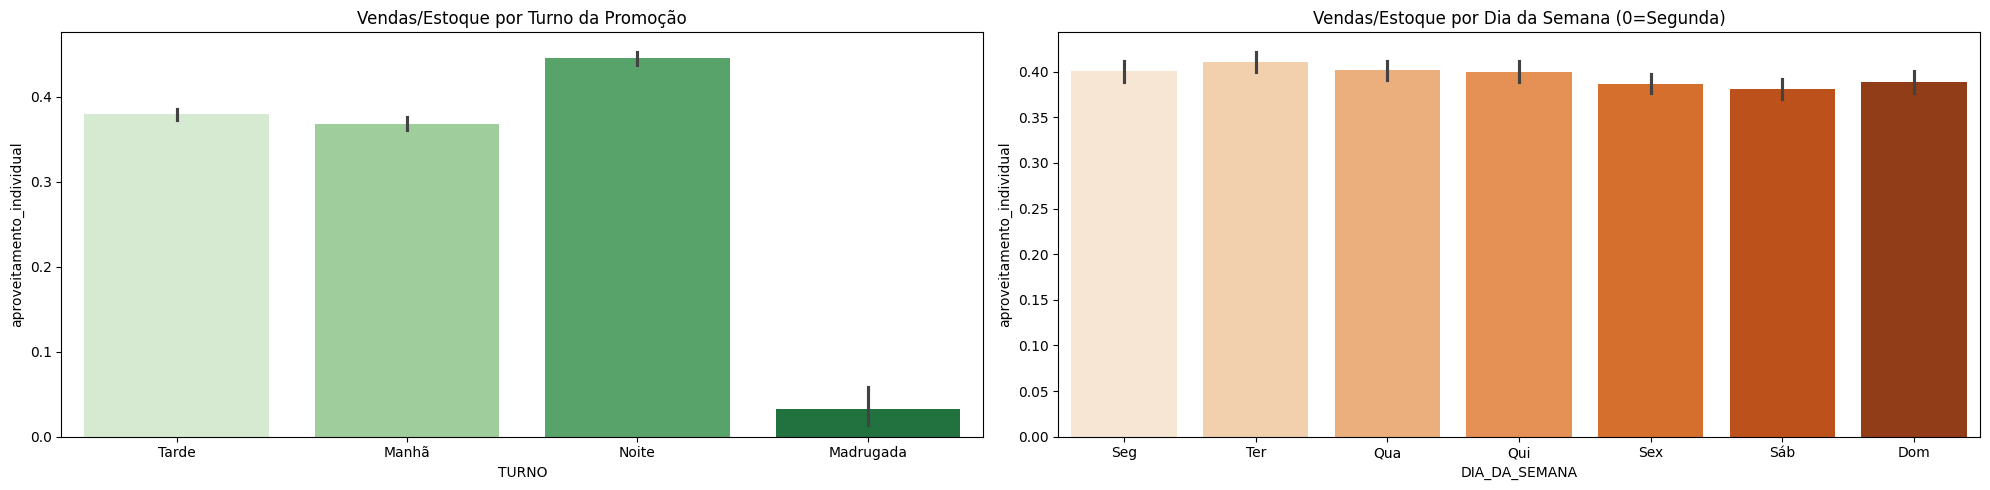

In [ ]:

# M√©dias da m√©trica por categoria
fig, axs = plt.subplots(1,2, figsize=(20,5))

sns.barplot(data=df, x='TURNO', y='aproveitamento_individual', ax=axs[0], palette='Greens')
axs[0].set_title('Vendas/Estoque por Turno da Promo√ß√£o')

sns.barplot(data=df, x='DIA_DA_SEMANA', y='aproveitamento_individual', ax=axs[1], palette='Oranges')
axs[1].set_title('Vendas/Estoque por Dia da Semana (0=Segunda)')
axs[1].set_xticklabels(['Seg','Ter','Qua','Qui','Sex','S√°b','Dom'])

plt.tight_layout()
plt.show()

Ser√£o realizados testes de hip√≥tese para verificar a exist√™ncia de diferen√ßas estatisticamente significativas. Foram aplicados tanto testes param√©tricos quanto n√£o param√©tricos, de acordo com a natureza dos dados.

In [ ]:
turnos = df['TURNO'].dropna().unique()
grupos_turno = [df.loc[df['TURNO'] == t, 'aproveitamento_individual'].dropna() for t in turnos]

anova_stat, anova_p = f_oneway(*grupos_turno)
print(f"ANOVA - Turno: estat√≠stica={anova_stat:.3f}, p-valor={anova_p:.4f}")

kruskal_stat, kruskal_p = kruskal(*grupos_turno)
print(f"Kruskal-Wallis - Turno: estat√≠stica={kruskal_stat:.3f}, p-valor={kruskal_p:.4f}")

ANOVA - Turno: estat√≠stica=86.805, p-valor=0.0000
Kruskal-Wallis - Turno: estat√≠stica=393.196, p-valor=0.0000


In [ ]:
dias = range(7)
grupos_dia = [df.loc[df['DIA_DA_SEMANA'] == d, 'aproveitamento_individual'].dropna() for d in dias]

anova_stat, anova_p = f_oneway(*grupos_dia)
print(f"ANOVA - Dia da Semana: estat√≠stica={anova_stat:.3f}, p-valor={anova_p:.4f}")

kruskal_stat, kruskal_p = kruskal(*grupos_dia)
print(f"Kruskal-Wallis - Dia da Semana: estat√≠stica={kruskal_stat:.3f}, p-valor={kruskal_p:.4f}")


ANOVA - Dia da Semana: estat√≠stica=3.428, p-valor=0.0022
Kruskal-Wallis - Dia da Semana: estat√≠stica=11.756, p-valor=0.0676


Ap√≥s avaliar num contexto de grupos com o testes Anova e Kruskal-Wallis, ser√£o avaliados as diferen√ßas dois a dois atrav√©s do teste de compara√ß√£o de tukey.

In [ ]:


def tukey_posthoc(df, valor_col, grupo_col):
    # Remover NaNs
    df_filtrado = df[[valor_col, grupo_col]].dropna()
    
    tukey = pairwise_tukeyhsd(endog=df_filtrado[valor_col],
                              groups=df_filtrado[grupo_col],
                              alpha=0.05)
    
    print(f"Compara√ß√µes m√∫ltiplas para {grupo_col}:")
    print(tukey.summary())
    
    # Construir matriz de p-valores
    res = tukey._results_table.data[1:]  # Ignora cabe√ßalho
    
    grupos = sorted(df_filtrado[grupo_col].unique())
    matriz_p = pd.DataFrame(np.ones((len(grupos), len(grupos))), index=grupos, columns=grupos)
    
    for linha in res:
        g1, g2, meandiff, p_adj, lower, upper, reject = linha
        matriz_p.loc[g1, g2] = p_adj
        matriz_p.loc[g2, g1] = p_adj
    
    print("\nMatriz de p-valores (duas casas decimais):")
    display(matriz_p.round(3))
    print("\n")

# Aplicar para cada vari√°vel:

tukey_posthoc(df, 'aproveitamento_individual', 'TURNO')
tukey_posthoc(df, 'aproveitamento_individual', 'DIA_DA_SEMANA')


Compara√ß√µes m√∫ltiplas para TURNO:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Madrugada  Manh√£   0.3351   0.0  0.1729  0.4974   True
Madrugada  Noite   0.4125   0.0  0.2502  0.5747   True
Madrugada  Tarde   0.3462   0.0  0.1841  0.5084   True
    Manh√£  Noite   0.0773   0.0  0.0624  0.0922   True
    Manh√£  Tarde   0.0111 0.163 -0.0027  0.0249  False
    Noite  Tarde  -0.0662   0.0 -0.0793 -0.0531   True
------------------------------------------------------

Matriz de p-valores (duas casas decimais):


Madrugada  Manh√£  Noite  Tarde
Madrugada        1.0  0.000    0.0  0.000
Manh√£            0.0  1.000    0.0  0.163
Noite            0.0  0.000    1.0  0.000
Tarde            0.0  0.163    0.0  1.000



Compara√ß√µes m√∫ltiplas para DIA_DA_SEMANA:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0108 0.8391 -0.0132  0.0348  False
     0      2   0.0012    1.0  -0.023  0.0254  False
     0      3  -0.0003    1.0 -0.0242  0.0236  False
     0      4  -0.0139 0.6015 -0.0378  0.0099  False
     0      5  -0.0195 0.2134 -0.0439  0.0048  False
     0      6  -0.0114 0.8458 -0.0371  0.0142  False
     1      2  -0.0096 0.8905 -0.0331  0.0139  False
     1      3  -0.0111 0.7954 -0.0343  0.0121  False
     1      4  -0.0247 0.0272 -0.0479 -0.0016   True
     1      5  -0.0304  0.003  -0.054 -0.0067   True
     1      6  -0.0223 0.1194 -0.0473  0.0028  False
     2      3  -0.0015    1.0 -0.0249  0.0219  False
     2      4  -0.0151 0.4743 -0.0384  0.0082  False
     2      5  -0.0207 0.1379 -0.0446  0.0031  False
     2      6  -0.0126 0.7589 -0.0378  0.0126  False

0      1      2      3      4      5      6
0  1.000  0.839  1.000  1.000  0.602  0.213  0.846
1  0.839  1.000  0.890  0.795  0.027  0.003  0.119
2  1.000  0.890  1.000  1.000  0.474  0.138  0.759
3  1.000  0.795  1.000  1.000  0.587  0.196  0.844
4  0.602  0.027  0.474  0.587  1.000  0.992  1.000
5  0.213  0.003  0.138  0.196  0.992  1.000  0.966
6  0.846  0.119  0.759  0.844  1.000  0.966  1.000

Contagem de promo√ß√µes por VERTICAL e Dia da Semana:


DIA_DA_SEMANA       0     1     2     3     4     5     6
VERTICAL                                                 
ACC               340   368   304   352   364   316   314
APP & SPORTS     1493  1694  1698  1814  2069  1987  1567
BEAUTY & HEALTH   915   982   920   981  1100   901   753
CE                982  1172  1147  1196  1204  1237   912
CPG               328   481   360   355   309   385   237
ENTERTAINMENT      69    43    83    72    65    85    62
HOME & INDUSTRY  1326  1553  1351  1489  1654  1595  1282
OTHERS             38    42    42    25    34    33    26
T & B             304   362   355   466   366   342   231

Contagem de promo√ß√µes por VERTICAL e Turno:


TURNO            Madrugada  Manh√£  Noite  Tarde
VERTICAL                                       
ACC                      1    781    719    857
APP & SPORTS             0   3955   3480   4887
BEAUTY & HEALTH          0   1898   1600   3054
CE                      62   2188   2165   3435
CPG                      0    539    700   1216
ENTERTAINMENT            0    124    138    217
HOME & INDUSTRY          7   3019   2745   4479
OTHERS                   0     59     53    128
T & B                    0    632    558   1236

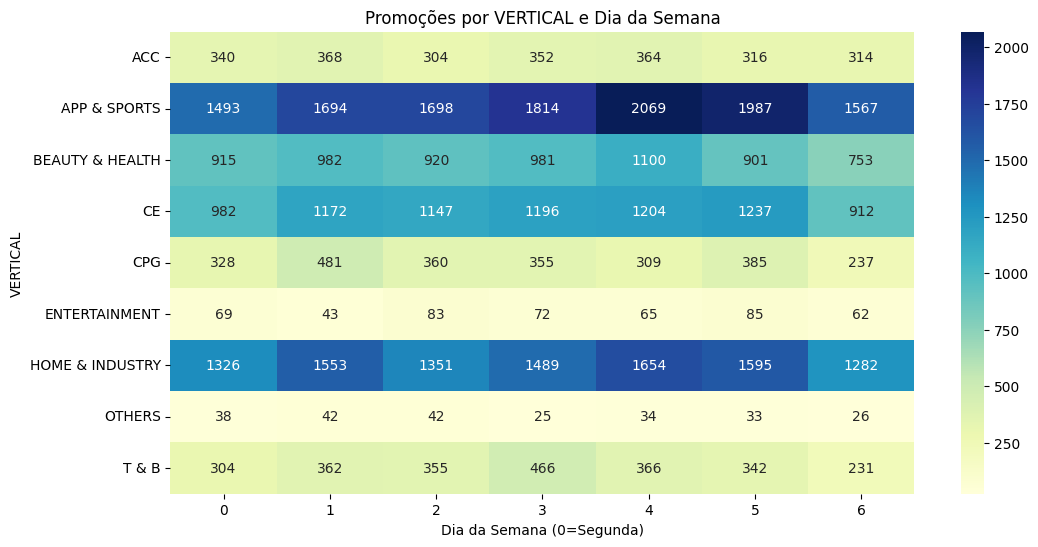

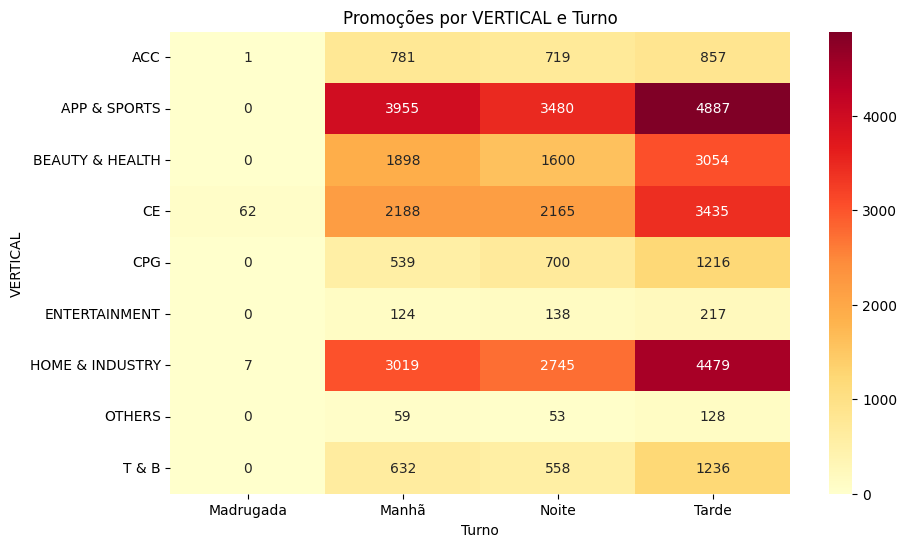

In [ ]:
# Criar tabelas de contagem
contagem_dia_vertical = pd.crosstab(df['VERTICAL'], df['DIA_DA_SEMANA'])
contagem_turno_vertical = pd.crosstab(df['VERTICAL'], df['TURNO'])

print("Contagem de promo√ß√µes por VERTICAL e Dia da Semana:")
display(contagem_dia_vertical)

print("Contagem de promo√ß√µes por VERTICAL e Turno:")
display(contagem_turno_vertical)

# Opcional: Gr√°fico heatmap para visualizar concentra√ß√£o

plt.figure(figsize=(12,6))
sns.heatmap(contagem_dia_vertical, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Promo√ß√µes por VERTICAL e Dia da Semana')
plt.xlabel('Dia da Semana (0=Segunda)')
plt.ylabel('VERTICAL')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(contagem_turno_vertical, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Promo√ß√µes por VERTICAL e Turno')
plt.xlabel('Turno')
plt.ylabel('VERTICAL')
plt.show()

## C√°lculo de estimativa de receita final

Como a receita de 1,1% das ofertas n√£o era conhecida, optou-se por estim√°-la. Para isso, foi utilizado um intervalo de confian√ßa de 95%, calculado a partir das m√©dias por Dominio_ID.

In [ ]:

import numpy as np
import pandas as pd
from scipy import stats

# =========================
# 1. Vis√£o geral
# =========================
visao_geral = pd.DataFrame({
    'ofertas_realizadas': [len(df)], 
    'total_vendas': [df['SOLD_QUANTITY'].sum()],
    'total_receita': [df['SOLD_AMOUNT'].sum()],
    'total_estoque': [df['INVOLVED_STOCK'].sum()]
})

visao_geral['aproveitamento_estoque'] = (
    visao_geral['total_vendas'] / visao_geral['total_estoque']
)

print("\nüìä Vis√£o geral:")
display(visao_geral)

# =========================
# 2. Estimativa para promo√ß√µes sem SOLD_AMOUNT mas com vendas > 0
# =========================

# 2.1 Calcular pre√ßo m√©dio por item usando dados completos
df_precos = df[df['SOLD_AMOUNT'].notna()].copy()
df_precos['PRECO_MEDIO_ITEM'] = (
    df_precos['SOLD_AMOUNT'] / 
    (df_precos['INVOLVED_STOCK'] - df_precos['REMAINING_STOCK_AFTER_END'])
)

# Remover valores inv√°lidos
df_precos = df_precos.replace([np.inf, -np.inf], np.nan)
df_precos = df_precos.dropna(subset=['PRECO_MEDIO_ITEM'])

# Fun√ß√£o para IC 95%
def ic_95(series):
    n = len(series)
    mean = series.mean()
    if n > 1:
        sem = stats.sem(series)
        h = sem * stats.t.ppf(0.975, n - 1)
    else:
        h = 0
    return mean, mean - h, mean + h

# M√©dia e IC95 por categoria
precos_agg = (
    df_precos.groupby('DOM_DOMAIN_AGG1')['PRECO_MEDIO_ITEM']
    .apply(lambda x: ic_95(x))
    .apply(pd.Series)
)
precos_agg.columns = ['mean', 'lower_ci95', 'upper_ci95']

print("\nüí∞ Pre√ßo m√©dio por item e IC95 por DOM_DOMAIN_AGG1:")
display(precos_agg)

# 2.2 Aplicar estimativa para casos sem SOLD_AMOUNT mas com vendas > 0
df_sem_valor = df[
    df['SOLD_AMOUNT'].isna() &
    ((df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END']) > 0)
].copy()

df_sem_valor['VENDAS_CALCULADAS'] = (
    df_sem_valor['INVOLVED_STOCK'] - df_sem_valor['REMAINING_STOCK_AFTER_END']
)

# Mapear pre√ßos estimados
df_sem_valor = df_sem_valor.merge(
    precos_agg,
    left_on='DOM_DOMAIN_AGG1',
    right_index=True,
    how='left'
)

# Estimar receita para tr√™s cen√°rios
df_sem_valor['ESTIMATIVA_PESSIMISTA'] = (
    df_sem_valor['VENDAS_CALCULADAS'] * df_sem_valor['lower_ci95']
)
df_sem_valor['ESTIMATIVA_NORMAL'] = (
    df_sem_valor['VENDAS_CALCULADAS'] * df_sem_valor['mean']
)
df_sem_valor['ESTIMATIVA_OTIMISTA'] = (
    df_sem_valor['VENDAS_CALCULADAS'] * df_sem_valor['upper_ci95']
)

# =========================
# 3. Receita estimada e total
# =========================
receita_est_pessimista = df_sem_valor['ESTIMATIVA_PESSIMISTA'].sum()
receita_est_normal = df_sem_valor['ESTIMATIVA_NORMAL'].sum()
receita_est_otimista = df_sem_valor['ESTIMATIVA_OTIMISTA'].sum()

print("\nüìà Receita estimada para promo√ß√µes sem SOLD_AMOUNT (vendas > 0):")
print(f"Pessimista (IC95-): R$ {receita_est_pessimista:,.2f}")
print(f"Normal (m√©dia):    R$ {receita_est_normal:,.2f}")
print(f"Otimista (IC95+):  R$ {receita_est_otimista:,.2f}")

# Receita real conhecida
receita_real = visao_geral['total_receita'].sum(skipna=True)

# Receita total
receita_total_pessimista = receita_real + receita_est_pessimista
receita_total_normal = receita_real + receita_est_normal
receita_total_otimista = receita_real + receita_est_otimista

print("\nüíµ Receita total estimada com preenchimento dos valores ausentes:")
print(f"Pessimista: R$ {receita_total_pessimista:,.2f}")
print(f"Normal:     R$ {receita_total_normal:,.2f}")
print(f"Otimista:   R$ {receita_total_otimista:,.2f}")



üìä Vis√£o geral:


ofertas_realizadas  total_vendas  total_receita  total_estoque  \
0               44932      264051.0      1258663.5        1641073   

   aproveitamento_estoque  
0                0.160901


üí∞ Pre√ßo m√©dio por item e IC95 por DOM_DOMAIN_AGG1:


mean  lower_ci95  upper_ci95
DOM_DOMAIN_AGG1                                                
ACC TOOLS                      7.475082    5.572660    9.377503
ANTIQUES & HOBBIES            15.678333  -27.792313   59.148980
APPAREL                        5.409468    5.265257    5.553679
APPAREL ACCESORIES             5.575615    5.255475    5.895754
AUTOPARTS                      5.204474    4.879999    5.528948
BABY                          10.623121    8.562330   12.683912
BATTERIES                      2.098428    1.705796    2.491060
BEAUTY EQUIPMENT               8.220556    7.510968    8.930144
BOOKS, MULTIMEDIA & OTHER E!   5.399508    4.721355    6.077661
CLEANING                       4.965217    4.193321    5.737113
COMPUTERS                     12.585911   10.891759   14.280063
DRINKS                         4.270739    2.694271    5.847208
ELECTRONICS                   23.036297   20.727658   25.344935
FOODS                          2.904234    2.648733    3.159735
FOOTWEAR                      10.660505   10.169200   11.151810
HOME&DECOR                     6.422380    6.046052    6.798709
INDUSTRY                      11.244985    9.999557   12.490414
MOBILE                        21.482072   18.817698   24.146445
MOTOPARTS                      9.109184    8.157683   10.060685
MUSICAL INSTRUMENTS           13.349667    8.222543   18.476790
OTHER                          4.552062    2.614410    6.489715
PARTY                          4.683174    4.143852    5.222496
PERSONAL CARE                  3.881934    3.671515    4.092354
PERSONAL HYGIENE               4.652926    4.157517    5.148336
PET PRODUCTS                   7.204672    5.679287    8.730057
PETS FOOD                      4.992543    4.309101    5.675985
PHARMACEUTICS                  7.941538    7.182566    8.700510
SECURITY                      10.993167    9.821063   12.165272
SPORTS                         5.673660    5.268480    6.078841
STATIONARY                     4.455646    3.388661    5.522632
SUPLEMENTS                    11.016832    9.723612   12.310052
TOOLS AND CONSTRUCTION        10.250575    9.360494   11.140656
TOYS AND GAMES                 8.991367    7.252427   10.730307
VEHICULAR MULTIMEDIA          14.278973   11.490537   17.067409
WHEELS & TIRES                34.843350   26.252403   43.434297


üìà Receita estimada para promo√ß√µes sem SOLD_AMOUNT (vendas > 0):
Pessimista (IC95-): R$ 36,688.33
Normal (m√©dia):    R$ 41,909.41
Otimista (IC95+):  R$ 47,130.49

üíµ Receita total estimada com preenchimento dos valores ausentes:
Pessimista: R$ 1,295,351.83
Normal:     R$ 1,300,572.91
Otimista:   R$ 1,305,793.99
